Here we are going to try to develope an alogrithm in order to solve the convex hull and its complexity alongside the the graphic for both instruments

Aguilar Huerta Jorge Ivan 

Cabrera Gonzales Angel Gabriel -


Salazar Bustillos Gabriel Isaías - 

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from bokeh.plotting import figure, output_notebook, show

# SciPy Algorithm (Extremely Easy)

Here we will see the way to solve a convex hull with scipy which let us do
the whole area which not too many lines of code, therefore to use this library
is one of the best options, however it is important to understand the algorithm
on its pure code.

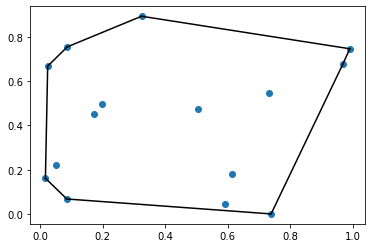

In [8]:
data = np.random.rand(15, 2)

hull = ConvexHull(data)

plt.plot(data[:,0], data[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(data[simplex, 0], data[simplex, 1], 'k-')

# Elegan Solution of Convex Hull

This algorithm was created by Thomas Bouda and it's a simplificate version 
of the Graham's Scan

In [9]:
#with this one we split the points in two parts
def split(u, v, points):
    #return the points on the left of the UV
    return [p for p in points if np.cross(p - u, v - u) < 0]

In [10]:
def extend(u, v, points):
    if not points:
        return []
    
    #WE need to find the furthest point W and split search to Wv and WU
    w = min(points, key=lambda p: np.cross(p - u, v - u))
    p1, p2 = split(w, v, points), split(u, w, points)
    return extend(w, v, p1) + [w] + extend(u, w, p2)


In [11]:
def convexHull(points):
    #Find two hull points, U, V, and split to left and right search
    u = min(points, key=lambda p: p[0])
    v = max(points, key=lambda p: p[0])
    left, right = split(u, v, points), split(v, u, points)
    
    #find the convex hull on each side
    return [v] + extend(u, v, left) + [u] + extend(v, u, right) + [v]

In [14]:
points = np.random.rand(100, 2)
hull = np.array(convexHull(points))
hull

array([[0.99750973, 0.93840601],
       [0.95078324, 0.98480922],
       [0.11735918, 0.99581337],
       [0.10684748, 0.99086182],
       [0.06072611, 0.8576312 ],
       [0.0153268 , 0.45716699],
       [0.04096257, 0.00170786],
       [0.66134733, 0.01316759],
       [0.96017872, 0.02515884],
       [0.98355124, 0.17808084],
       [0.99750973, 0.93840601]])

In [15]:
output_notebook()

plot = figure()
plot.scatter(x=points[:, 0], y=points[:, 1])
plot.line(x=hull[:, 0], y=hull[:, 1], color='red')

show(plot)

Loading BokehJS ...